# Sales Data Exploratory Analysis

An exploratory analysis of historical sales data focused on understanding
sales behavior, profitability patterns, and key business drivers.


In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


plt.style.use('default')

In [11]:
df = pd.read_csv('data/superstore.csv')
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [13]:
df.shape

(51290, 27)

The dataset contains 51,290 rows and multiple variables related to orders,
customers, products, and sales performance, indicating a transactional-level dataset.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

### Missing Values Analysis

The dataset does not contain missing values in any of its columns.
This indicates good data quality and allows the analysis to proceed
without the need for imputation or row removal.

In [18]:
df.isnull().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

### 

In [20]:
df["Order.Date"] = pd.to_datetime(df["Order.Date"])
df["Ship.Date"] = pd.to_datetime(df["Ship.Date"])
df["Year"] = df["Order.Date"].dt.year
df["Month"] = df["Order.Date"].dt.month

Date columns were converted to datetime format to support time-based analysis.
Numerical and categorical variables present appropriate data types for
aggregation and grouping. The `Month` column was explicitly defined as an
integer to ensure consistency in temporal analysis.

In [22]:
df.dtypes


Category                  object
City                      object
Country                   object
Customer.ID               object
Customer.Name             object
Discount                 float64
Market                    object
记录数                        int64
Order.Date        datetime64[ns]
Order.ID                  object
Order.Priority            object
Product.ID                object
Product.Name              object
Profit                   float64
Quantity                   int64
Region                    object
Row.ID                     int64
Sales                      int64
Segment                   object
Ship.Date         datetime64[ns]
Ship.Mode                 object
Shipping.Cost            float64
State                     object
Sub.Category              object
Year                       int32
Market2                   object
weeknum                    int64
Month                      int32
dtype: object

In [24]:
df.duplicated().sum()

0

No duplicate records were found in the dataset.

### Sales and Profit Distribution

The sales and profit distributions are right-skewed, with mean values
significantly higher than the median. This indicates that most transactions
have relatively low sales and profit values, while a small number of high-value
orders significantly impact the overall averages.

Negative profit values are present, which is expected due to discounts,
shipping costs, and business strategies.



In [26]:
df[["Sales", "Profit"]].describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.498440,28.610982
std,487.567175,174.340972
min,0.000000,-6599.978000
25%,31.000000,0.000000
50%,85.000000,9.240000
75%,251.000000,36.810000
max,22638.000000,8399.976000


With the data validated and properly formatted, the next step focuses on
exploring sales patterns and relationships through visual analysis.

#### How have total sales evolved over time?

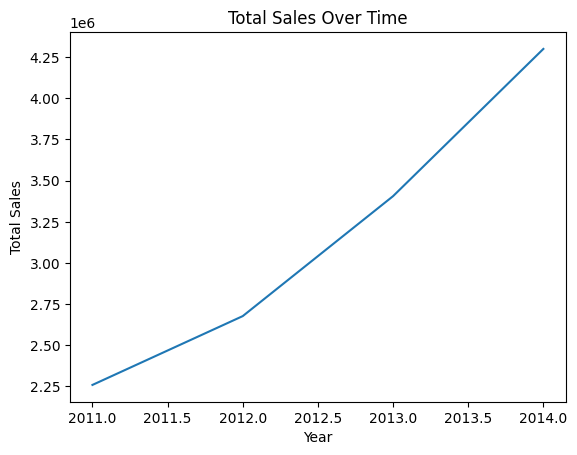

In [28]:
sales_over_time = df.groupby('Year')['Sales'].sum()

plt.figure()
sales_over_time.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

Total sales show a general upward trend over the years covered by the dataset
(2011–2014), indicating business growth during this period. Some fluctuations
are observed, which may be related to market conditions or seasonal effects.

#### Which product categories generate the highest total sales?

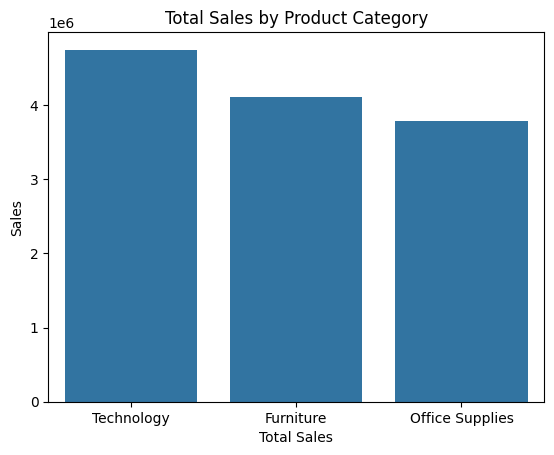

In [69]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()

plt.figure()
sales_by_category = sales_by_category.sort_values(by="Sales", ascending=False)
sns.barplot(
    data=sales_by_category,
    x='Category',
    y='Sales'
)

plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.xlabel('Total Sales')
plt.show()

The analysis shows that sales are not evenly distributed across product
categories. The Technology category generates the highest total sales,
followed by Furniture and Office Supplies. This suggests that technology
products play a key role in the company's revenue.

#### What is the relationship between sales value and profit?

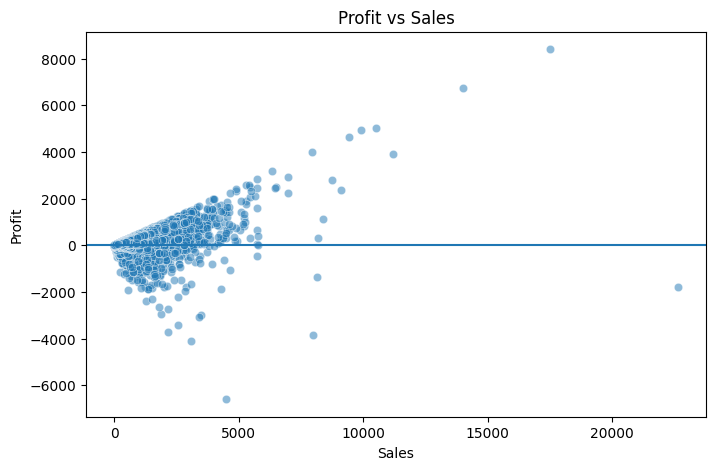

In [56]:
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=df,
    x="Sales",
    y="Profit",
    alpha=0.5
)

plt.axhline(0)
plt.title("Profit vs Sales")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()



The relationship between sales and profit is generally positive, but higher
sales do not always translate into higher profit. Several transactions with
high sales values result in low or even negative profit, indicating the impact
of discounts, shipping costs, or pricing strategies.

#### Which category–region combinations drive sales performance?

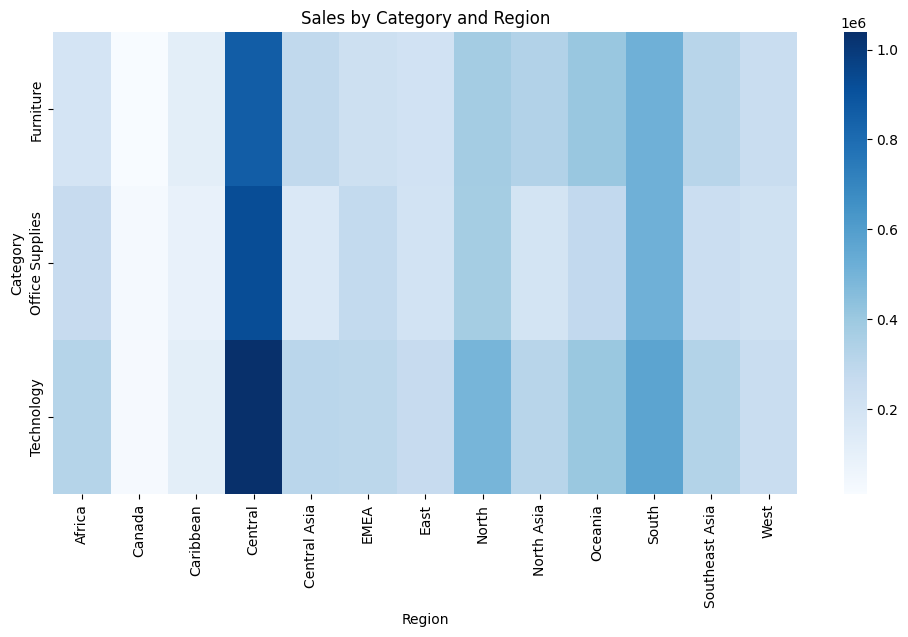

In [65]:
pivot_table = df.pivot_table(
    values="Sales",
    index="Category",
    columns="Region",
    aggfunc="sum"
)

plt.figure(figsize=(12, 6))

sns.heatmap(
    pivot_table,
    cmap="Blues"
)

plt.title("Sales by Category and Region")
plt.xlabel("Region")
plt.ylabel("Category")

plt.show()



Sales performance varies across regions and product categories. Some categories
perform particularly well in specific regions, while others show more balanced
results. This suggests opportunities for more targeted regional and category-
focused strategies.


## Final Conclusions

This exploratory analysis helped highlight key sales patterns, profitability
drivers, and regional differences. The results reinforce the importance of
understanding not only total sales, but also how profit behaves across products
and regions. These insights can support more informed business decisions and
future analytical work.